In [ ]:
import pickle
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from ipywidgets import interact, widgets

# Load the dataset
dataset_path = 'dataset_carla.csv'
df = pd.read_csv(dataset_path)

# Preprocess the data
df.dropna(inplace=True)  # Drop rows with missing values
X = df.drop('Theta', axis=1)  # Features
y = df['Theta']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost model
model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=4)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Save the trained model to a file
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Load the model from the file
with open('xgboost_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Function to predict theta based on input parameters
def predict_theta(mass, radius_of_curvature, cof, speed):
    f_seat = mass * 9.8
    f_friction = f_seat * cof
    formula_theta = np.arctan(f_seat * (speed ** 2) - f_friction * 9.8 * radius_of_curvature / (f_seat + f_friction * speed ** 2))
    dummy_data = {
        'Speed_car': [speed],
        'cof_Range': [cof],
        'Radius_curvature': [radius_of_curvature],
        'Mass_person': [mass]
    }
    dummy_df = pd.DataFrame(dummy_data)
    prediction = np.abs(loaded_model.predict(dummy_df))
    return prediction[0]

# Interactive function to predict theta and calculate error
def predict_and_calculate_error(mass_value, radius_value, cof_value, speed_value):
    theta_predicted = predict_theta(mass_value, radius_value, cof_value, speed_value)
    return theta_predicted

# Define sliders for input parameters
mass_slider = widgets.FloatSlider(value=70, min=50, max=120, step=0.01, description='Mass (kg)')
radius_slider = widgets.FloatSlider(value=2, min=1, max=10, step=0.01, description='Radius (m)')
cof_slider = widgets.FloatSlider(value=0.8, min=0.1, max=1, step=0.01, description='Friction Coefficient')
speed_slider = widgets.FloatSlider(value=0.348, min=0, max=1, step=0.01, description='Speed (m/s)')

# Create an interactive widget
interactive_plot = interact(predict_and_calculate_error, mass_value=mass_slider, radius_value=radius_slider,
                             cof_value=cof_slider, speed_value=speed_slider)

# Display the interactive widget
interactive_plot
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

# Calculate R-squared (R^2) Score
r2 = r2_score(y_test, predictions)
print("R-squared (R^2) Score:", r2)

interactive(children=(FloatSlider(value=70.0, description='Mass (kg)', max=120.0, min=50.0, step=0.01), FloatS…

Mean Squared Error: 0.006415641305814872
Mean Absolute Error: 0.02789441568004729
R-squared (R^2) Score: 0.9850358607095161


In [ ]:
import time

# Function to predict theta based on input parameters and measure the time taken
def predict_theta_with_time(mass, radius_of_curvature, cof, speed):
    start_time = time.time()  # Record the start time
    f_seat = mass * 9.8
    f_friction = f_seat * cof
    formula_theta = np.arctan(f_seat * (speed ** 2) - f_friction * 9.8 * radius_of_curvature / (f_seat + f_friction * speed ** 2))
    dummy_data = {
        'Speed_car': [speed],
        'cof_Range': [cof],
        'Radius_curvature': [radius_of_curvature],
        'Mass_person': [mass]
    }
    dummy_df = pd.DataFrame(dummy_data)
    prediction = np.abs(loaded_model.predict(dummy_df))
    end_time = time.time()  # Record the end time
    elapsed_time = end_time - start_time  # Calculate the elapsed time
    return prediction[0], elapsed_time

# Generate random inputs
np.random.seed(42)  # For reproducibility
num_samples = 50
speed_values = np.random.uniform(0.1, 2.0, num_samples)
cof_values = np.random.uniform(0.1, 1.0, num_samples)
radius_of_curvature_values = np.random.uniform(1, 10, num_samples)
mass_values = np.random.uniform(50, 100, num_samples)

# Measure time taken for each prediction
predictions = []
prediction_times = []

for i in range(num_samples):
    prediction, elapsed_time = predict_theta_with_time(mass_values[i], radius_of_curvature_values[i], cof_values[i], speed_values[i])
    predictions.append(prediction)
    prediction_times.append(elapsed_time)

# Calculate average time taken for each prediction
average_prediction_time = sum(prediction_times) / len(prediction_times)
print("Average time taken for each prediction:", average_prediction_time, "seconds")


Average time taken for each prediction: 0.019460105895996095 seconds


In [ ]:
prediction_times_tree= prediction_times
prediction_times_NN = [0.3446369171142578,
 0.24759268760681152,
 0.42723584175109863,
 0.3201749324798584,
 0.30782461166381836,
 0.3805844783782959,
 0.5178086757659912,
 0.39458537101745605,
 0.12352132797241211,
 0.11241292953491211,
 0.11478114128112793,
 0.12375450134277344,
 0.07579183578491211,
 0.07494759559631348,
 0.08235287666320801,
 0.08278465270996094,
 0.08046746253967285,
 0.0751490592956543,
 0.07895541191101074,
 0.0731201171875,
 0.08100247383117676,
 0.08066797256469727,
 0.08713579177856445,
 0.07958173751831055,
 0.0736236572265625,
 0.07933783531188965,
 0.07657384872436523,
 0.0816347599029541,
 0.08698773384094238,
 0.08513617515563965,
 0.07702517509460449,
 0.07172846794128418,
 0.07680869102478027,
 0.07409095764160156,
 0.07960057258605957,
 0.0759282112121582,
 0.07560253143310547,
 0.07534456253051758,
 0.08859014511108398,
 0.0787358283996582,
 0.07900810241699219,
 0.08517599105834961,
 0.07568645477294922,
 0.07792401313781738,
 0.07400894165039062,
 0.07428121566772461,
 0.07613182067871094,
 0.07853913307189941,
 0.08413362503051758,
 0.07812261581420898]
prediction_times_formula=[0.00012565199995151488,
 6.3280003814725205e-06,
 4.064000677317381e-06,
 4.083000021637417e-06,
 3.941999239032157e-06,
 4.432000423548743e-06,
 9.808999493543524e-06,
 4.45200021204073e-06,
 3.7130002965568565e-06,
 3.5960001696366817e-06,
 3.434000063862186e-06,
 3.1709996619611047e-06,
 4.028000148537103e-06,
 3.7039999369881116e-06,
 3.555000148480758e-06,
 3.7400004657683894e-06,
 3.4539998523541726e-06,
 3.6940000427421182e-06,
 3.979000211984385e-06,
 3.5039993235841393e-06,
 4.026999704365153e-06,
 3.7280005926731974e-06,
 3.6920000638929196e-06,
 3.5470002330839634e-06,
 4.21799995820038e-06,
 3.311000000394415e-06,
 4.165000063949265e-06,
 3.719999767781701e-06,
 3.400999958103057e-06,
 3.943000592698809e-06,
 3.660000402305741e-06,
 3.4020004022750072e-06,
 3.7760000850539654e-06,
 3.895000190823339e-06,
 4.120999619772192e-06,
 4.199000613880344e-06,
 3.983999704360031e-06,
 3.756999831239227e-06,
 4.0679997255210765e-06,
 3.997999556304421e-06,
 3.5780003599938937e-06,
 3.856000148516614e-06,
 3.96899940824369e-06,
 3.909999577444978e-06,
 1.0042999747383874e-05,
 4.11000019084895e-06,
 3.5529992601368576e-06,
 3.709000338858459e-06,
 3.529999958118424e-06,
 3.7239997254800983e-06]

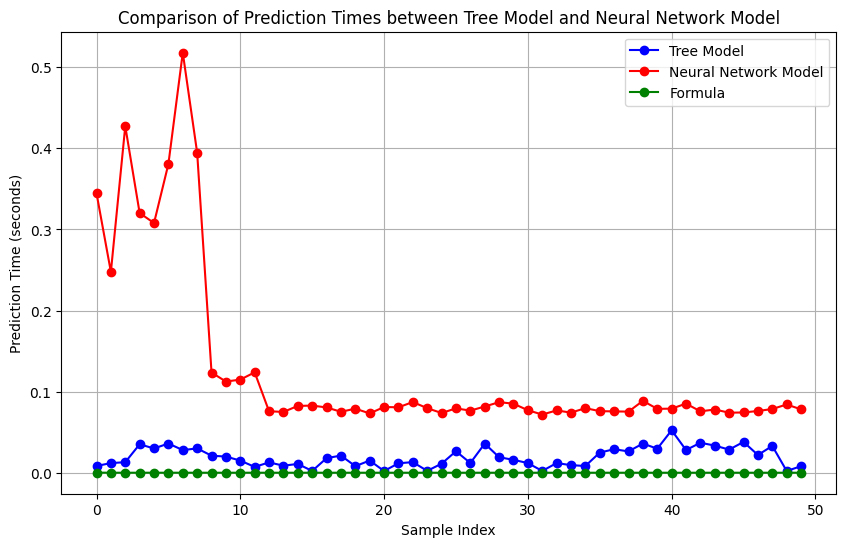

In [ ]:
# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(prediction_times_tree, label='Tree Model', marker='o', linestyle='-', color='blue')
plt.plot(prediction_times_NN, label='Neural Network Model', marker='o', linestyle='-', color='red')
plt.plot(prediction_times_formula, label='Formula', marker='o', linestyle='-', color='green')
plt.xlabel('Sample Index')
plt.ylabel('Prediction Time (seconds)')
plt.title('Comparison of Prediction Times between Tree Model and Neural Network Model')
plt.legend()
plt.grid(True)
plt.show()